# Version finale

In [93]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math
import random

## I) Population (Catherine)##

Nous souhaitons obtenir l'évolution de la population jusqu'à une année "a" choisie sur chacun des continents. 

Celle-ci dépend de différents paramètres : 

**la population de départ**, dont les données ont été prises à l'année 2017 par l'ONU (on considère que l'année 2017 est l'année 0)

**le taux d'accroissement**, dont les valeurs fixes viennent de l'INED

**les imprévus** qui peuvent survenir (guerre, épidémie, ect. mais la nature de ces problèmes et leurs conséquences n'ont pas été pris en compte)

In [94]:
continents=["Europe", "Amérique du Nord","Asie", "Afrique", "Amérique du Sud", "Océanie"]
pop={"Europe":742074000,"Amérique du Nord":361208000,"Asie":4504428000,"Afrique":1256268000, 
            "Amérique du Sud":645593000,"Océanie":40691000}


Nous avons décidé de se baser sur l'évolution exponentielle de la population, c'est l'évolution la plus réaliste. 

Elle suit la loi suivante :

**N(t)=N0*exp(k*t)**

N étant la population, N0 la population à la 1ère génération, k étant le taux d'accroissement, et t l'année.

On décide donc en premier temps de calculer **k**. Ce dernier se base sur le taux de natalité et de mortalité. Ceux-ci peuvent rester fixe au fil du temps, ou varier d'une manière aléatoire. Il a ensuite fallu créer 6 taux d'accroissement afin que l'on puisse faire varier chaque taux pour chaque pays, et décider si k restait fixe ou non au fil du temps.

In [95]:
def k1(n1,m1,fixe1):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe1 : 
        k1=(n1-m1)/100
    else :
        k1=(n1-m1)*u/100
    
    return k1

def k2(n2,m2,fixe2):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe2 : 
        k2=(n2-m2)/100
    else :
        k2=(n2-m2)*u/100
    
    return k2

def k3(n3,m3,fixe3):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe3 : 
        k3=(n3-m3)/100
    else :
        k3=(n3-m3)*u/100
    
    return k3

def k4(n4,m4,fixe4):
    """int^2*bool->float
    n: nombre de naissances, m1: nombre de décès"""
    
    u=random.random()
    
    if fixe4 : 
        k4=(n4-m4)/100
    else :
        k4=(n4-m4)*u/100
    
    return k4

def k5(n5,m5,fixe5):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe5: 
        k5=(n5-m5)/100
    else :
        k5=(n5-m5)*u/100
    
    return k5

def k6(n6,m6,fixe6):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe6 : 
        k6=(n6-m6)/100
    else :
        k6=(n6-m6)*u/100
    
    return k6

In [96]:
k6(50,40,False)

0.0570139354966506

On souhaite maintenant obtenir un dictionnaire qui nous renvoie **pour chaque continent la population** qui correspond à l'année voulue en fonction du taux de croissance. Il est nécessaire d'avoir autant de paramètres pour avoir une situation à chaque pays.

In [250]:
pop={"Europe":742074000,"Amérique du Nord":361208000,"Asie":4504428000,"Afrique":1256268000, 
            "Amérique du Sud":645593000,"Océanie":40691000}

def population(t,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6):
    """dict[str:list[int]"""
    
    popr={"Europe":[],"Amérique du Nord":[],"Asie":[],"Afrique":[],"Amérique du Sud":[],"Océanie":[]}

    if probleme1:
        popr["Europe"].append(round(pop["Europe"]*math.exp(k1(n1,m1,fixe1)*t)))
    else : 
        popr["Europe"].append(round(pop["Europe"]*math.exp(0.0005*t)))
            
    if probleme2:
        popr["Amérique du Nord"].append(round(pop["Amérique du Nord"]*math.exp(k2(n2,m2,fixe2)*t)))
    else : 
        popr["Amérique du Nord"].append(round(pop["Amérique du Nord"]*math.exp(0.0073*t)))
            
    if probleme3:
        popr["Asie"].append(round(pop["Asie"]*math.exp(k3(n3,m3,fixe3)*t)))
    else : 
        popr["Asie"].append(round(pop["Asie"]*math.exp(0.0085*t)))
            
    if probleme4:
        popr["Afrique"].append(round(pop["Afrique"]*math.exp(k4(n4,m4,fixe4)*t)))
    else : 
        popr["Afrique"].append(round(pop["Afrique"]*math.exp(0.0245*t)))
            
    if probleme5:
        popr["Amérique du Sud"].append(round(pop["Amérique du Sud"]*math.exp(k5(n5,m5,fixe5)*t)))
    else : 
        popr["Amérique du Sud"].append(round(pop["Amérique du Sud"]*math.exp(0.0095*t)))
            
    if probleme6:
        popr["Océanie"].append(round(pop["Océanie"]*math.exp(k6(n6,m6,fixe6)*t)))
    else : 
        popr["Océanie"].append(round(pop["Océanie"]*math.exp(0.0134*t)))
        
    return popr

In [251]:
population(1,pop,33,32,True,False,16,50,True,True,42,12,False,False,19,13,False,True,8,19,True,True,12,8,False,False)

{'Afrique': [1287426702],
 'Amérique du Nord': [257097135],
 'Amérique du Sud': [578344247],
 'Asie': [4542878822],
 'Europe': [748565280],
 'Océanie': [41239929]}

Maintenant, on souhaite voir **l'évolution de la population** à une année a choisie dans chaque continent.

In [99]:
pop={"Europe":742074000,"Amérique du Nord":361208000,"Asie":4504428000,"Afrique":1256268000, 
            "Amérique du Sud":645593000,"Océanie":40691000}

def evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6):
    """int*dict[str:int]*int²*bool²*int²*bool²*int²*bool²*int²*bool²*int²*bool²*int²*bool²->dict[str:list[int]]"""
    
    popr={"Europe":[],"Amérique du Nord":[],"Asie":[],"Afrique":[],"Amérique du Sud":[],"Océanie":[]}
    
    for t in range(a):
        if probleme1:
            popr["Europe"].append(round(pop["Europe"]*math.exp(k1(n1,m1,fixe1)*t)))
        else : 
            popr["Europe"].append(round(pop["Europe"]*math.exp(0.0005*t)))
            
        if probleme2:
            popr["Amérique du Nord"].append(round(pop["Amérique du Nord"]*math.exp(k2(n2,m2,fixe2)*t)))
        else : 
            popr["Amérique du Nord"].append(round(pop["Amérique du Nord"]*math.exp(0.0073*t)))
            
        if probleme3:
            popr["Asie"].append(round(pop["Asie"]*math.exp(k3(n3,m3,fixe3)*t)))
        else : 
            popr["Asie"].append(round(pop["Asie"]*math.exp(0.0085*t)))
            
        if probleme4:
            popr["Afrique"].append(round(pop["Afrique"]*math.exp(k4(n4,m4,fixe4)*t)))
        else : 
            popr["Afrique"].append(round(pop["Afrique"]*math.exp(0.0245*t)))
            
        if probleme5:
            popr["Amérique du Sud"].append(round(pop["Amérique du Sud"]*math.exp(k5(n5,m5,fixe5)*t)))
        else : 
            popr["Amérique du Sud"].append(round(pop["Amérique du Sud"]*math.exp(0.0095*t)))
            
        if probleme6:
            popr["Océanie"].append(round(pop["Océanie"]*math.exp(k6(n6,m6,fixe6)*t)))
        else : 
            popr["Océanie"].append(round(pop["Océanie"]*math.exp(0.0134*t)))
        
    return popr

In [100]:
evolution_pop(5,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)

{'Afrique': [1256268000, 1287426702, 1319358220, 1352081722, 1385616852],
 'Amérique du Nord': [361208000, 363854466, 366520322, 369205710, 371910774],
 'Amérique du Sud': [645593000, 651755358, 657976538, 664257101, 670597613],
 'Asie': [4504428000, 4542878822, 4581657870, 4620767944, 4660211871],
 'Europe': [742074000, 742445130, 742816445, 743187946, 743559633],
 'Océanie': [40691000, 41239929, 41796263, 42360102, 42931548]}

### Graphique de la population mondiale

** L1 : liste de la population en Europe **

** L2 : liste de la population en Amérique du Nord **

** L3 : liste de la population en Asie **

** L4 : liste de la population en Afrique **

** L5 : liste de la population en Amérique du Sud **

** L6 : liste de la population en Océanie **

A l'échelle mondiale, on regarde l'évolution de la population à l'année voulue.

In [101]:
def L7(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6):
    """"""
    
    L7=list()
    
    L1=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Europe"]
    L2=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Amérique du Nord"]
    L3=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Asie"]
    L4=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Afrique"]
    L5=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Amérique du Sud"]
    L6=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Océanie"]
    
    for t in range(0,a):
        nb=L1[t]+L2[t]+L3[t]+L4[t]+L5[t]+L6[t]
        L7.append(nb)
    return L7

In [102]:
L7(5,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)

[7550262000, 7629600407, 7710125658, 7791860525, 7874828291]

In [103]:
L_annee=[i for i in range(2017,2117)]

In [104]:
def total(L7):
    """"""
    
    plt.figure()
    plt.plot(L_annee, L7)
    plt.legend(["Monde"])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

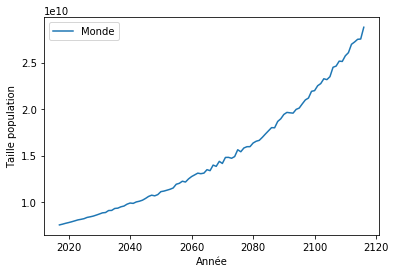

In [105]:
L7=L7(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)

total(L7)

A l'échelle mondiale, on regarde cette fois-ci la population dans chaque continent. (c'est à dire que toutes les populations sont représentées sur un même graphique)

In [106]:
def list_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6):
    """->list[int]"""

    L1=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Europe"]
    L2=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Amérique du Nord"]
    L3=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Asie"]
    L4=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Afrique"]
    L5=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Amérique du Sud"]
    L6=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Océanie"]
    
    return L1,L2,L3,L4,L5,L6

In [107]:
list_pop(5,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[3]

[1256268000, 1287426702, 1319358220, 1352081722, 1385616852]

In [108]:
def plot_pop(L1,L2,L3,L4,L5,L6,pop):
    plt.figure()
    plt.plot(L_annee,L1)
    plt.plot(L_annee,L2)
    plt.plot(L_annee,L3)
    plt.plot(L_annee,L4)
    plt.plot(L_annee,L5)
    plt.plot(L_annee,L6)
    plt.legend([continent for continent in continents])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

In [109]:
L1=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[0]
L2=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[1]
L3=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[2]
L4=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[3]
L5=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[4]
L6=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[5]

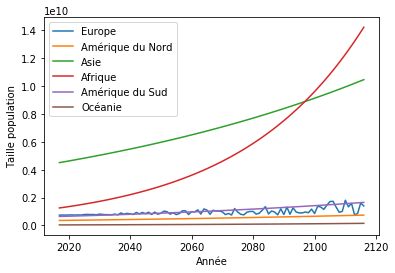

In [110]:
plot_pop(L1,L2,L3,L4,L5,L6,pop)

Même si nous voyons dans l'ensemble l'évolution de la population, les résultats sont trop imprécis pour en déduire quoique ce soit, du au fait que l'on prenne les résultats à l'échelle mondiale. Il faut donc visualiser la situation à l'échelle continentale.

### Graphiques de la population sur chaque continent

In [111]:
def plot_pop1(L1,pop):
    plt.figure()
    plt.plot(L_annee,L1)
    plt.legend([continents[0]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop2(L2,pop):
    plt.figure()
    plt.plot(L_annee,L2, color="orange")
    plt.legend([continents[1]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop3(L3,pop):
    plt.figure()
    plt.plot(L_annee,L3, color="green")
    plt.legend([continents[2]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop4(L4,pop):
    plt.figure()
    plt.plot(L_annee,L4, color="red")
    plt.legend([continents[3]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop5(L5,pop):
    plt.figure()
    plt.plot(L_annee,L5, color="purple")
    plt.legend([continents[4]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop6(L6,pop):
    plt.figure()
    plt.plot(L_annee,L6, color="brown")
    plt.legend([continents[5]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

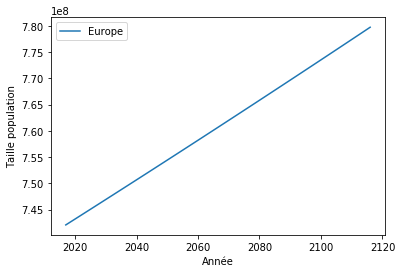

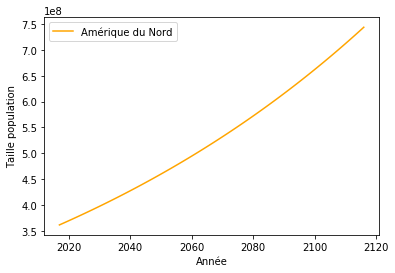

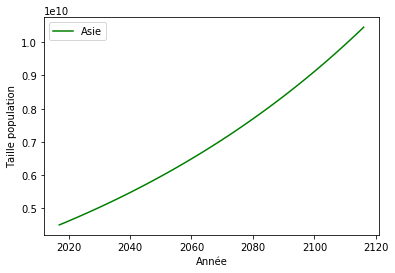

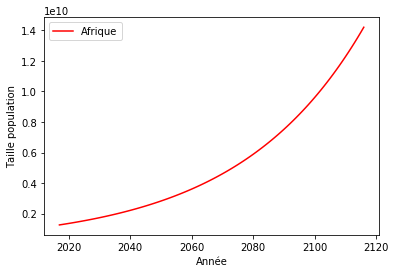

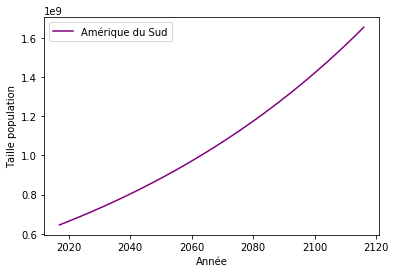

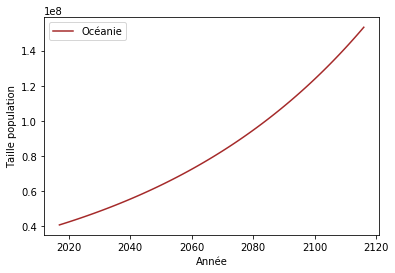

In [112]:
L1=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[0]
L2=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[1]
L3=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[2]
L4=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[3]
L5=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[4]
L6=list_pop(100,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[5]

plot_pop1(L1,pop)
plot_pop2(L2,pop)
plot_pop3(L3,pop)
plot_pop4(L4,pop)
plot_pop5(L5,pop)
plot_pop6(L6,pop)

## II) PIB (Cyrielle)##

# Modélisation du PIB #

## Introduction ##

### A) Formule ###

Le PIB s'exprime en dollars et se calcule de la façon suivante : PIB = CF + FBCF + VS + X - M

Avec : 

- CF = consommation finale effective

- FBCF = investissement (formation brute de capital fixe)

- VS = variation des stocks

- X = exportations

- M = importations

### B) Hypothèses ###

1) On suppose que le cours du dollar ne change pas avec le temps. Il reste fixe à 1€ = 1,13$.

2) On suppose que le nombre d'entreprises est proportionnelle au nombre d'habitants.

3) On suppose que la variation des stocks est proportionnelle au nomnre d'entreprises.

## I- PIB mondial (1ère approche : données France) ##

Le PIB mondial ne prend pas en compte les exportations et importations qui s'annulent.

### 1) Calcul de CF ###

On définit la consommation finale par : dépense moyenne annuelle * nb de personnes

La dépense moyenne annuelle change selon le type de foyer (d'après l'Insee avec les valeurs françaises):

1 personne : 16 641€ soit 18 785$

2 personnes : 18 000€ soit 20 319$

3 personnes : 23 016€ soit 25 981$

4 personnes : 30 684€ soit 34 637$

5 personnes : 32 653€ soit 36 860$

Nous avons la proportions de chaque foyer en France :

1 personne : 35%

2 personnes : 33%

3 personnes : 14%

4 personnes : 12%

5 personnes : 6%

Nous calculons la proportion de personnes vivant dans un foyer de 1, 2, 3, 4 ou 5 personnes. Pour cela nous calculons grâce aux proportions ci-dessus, le nombre de personnes totales d'une population.

35 + 33 2 + 14 3 + 12 4 + 6 5 = 221

Ainsi, nous ressortons les proportions de personnes vivant dans chaque type de foyer :

1 personne : 35 / 221 * 100 = 16%

2 personnes : 33 2 / 221 100 = 30%

3 personnes : 14 3 / 221 100 = 19%

4 personnes : 12 4 / 221 100 = 22%

5 personnes : 5 6 / 221 100 = 13%

In [198]:
p={1:0.16, 2:0.30, 3:0.19, 4:0.22, 5:0.13} #proportion de personnes vivants dans un certain foyer
d={1:18785, 2:20319, 3:25981, 4:34637, 5:36860} #dépenses du foyer

In [199]:
def CF(pop, p, d):
    """int*dict[int:float]*dict[int:int]->float"""
    D=dict()
    for i in p:
        D[i]=pop*p[i]
    DR=dict()
    for j in D:
        DR[j]=D[j]*d[j]/j
    s=0
    for k in DR:
        s=DR[k]+s
    return s

In [200]:
CF(7550262000, p, d)

79748195241450.0

### 2) Calcul du FBCF ###

Le FBCF se calcule par la somme des achats et travaux immobiliers des particuliers et les investissements des entreprises et institutions publiques.

En 2017, il y a, d'après l'Insee, 515 900 000 000€ investissements des institutions et entreprises françaises. Soit 582 476 895 000$.

En 2017, il y a, 4 751 553 entreprises et institutions françaises. Il y a également 67 120 000 habitants en France.

Nous pouvons donc dire qu'approximativement 1 entreprise investit 582 476 895 000 / 4 751 553$ par an.

Une entreprise investit donc 122 587$ par an.

Pour déterminer le nombre d'entreprises on fait un produit en croix : 4 751 553 * pop / 67 120 000.

In [201]:
 fbcf={1:953, 2:2106, 3:738, 4:2378, 5:1589} #dépenses des particuliers

In [202]:
def FBCF(pop, fbcf, p):
    """int*dict[int:int]*dict[int:float]->float"""
    D=dict()
    for i in p:
        D[i]=pop*p[i]
    DR=dict()
    for j in D:
        DR[j]=D[j]*fbcf[j]/j
    s=round(4751553*pop*122587/67120000)
    for k in DR:
        s=s+DR[k]
    return s

In [203]:
FBCF(7550262000, fbcf, p)

70711162371036.0

### 3) Calcul de VS ###

La variation des stocks se calcule grâce aux stocksde début d'année moins les tsocks de fin d'années.

En 2017, en France, d'après l'Insee, il y a 21 000 000 000€ de variation de stocks, soit 23 698 017 000$.

Il y a 4 751 553 entreprises et institutions en France en 2017.

On calcule donc la variation de stocks pour une entreprise : 23 698 017 000 / 4 751 553$.

Une entreprise a donc une variation de stock d'environ 4 987$.

In [204]:
def VS(pop):
    """int->number"""
    e=round(4751553*pop/67120000) #nombre d'entreprises
    return e*4987

In [205]:
VS(7550262000)

2665538872916

### Calcul du PIB mondial ###

In [206]:
def PIB(pop, p, d, fbcf):
    """int*dict[int:float]*dict[int:int]*dict[int*int]->float"""
    cfu=CF(pop, p, d)
    fbcfu=FBCF(pop, fbcf, p)
    vsu=VS(pop)
    return cfu+fbcfu+vsu

In [207]:
PIB(7550262000, p, d, fbcf)

153124896485402.0

La première approximation est éloignée de la réalité puisque le PIB de 2017 mondial était de 79 865 000 000 000$.

## II- PIB mondial (2ème approche : données par continents)

### 1) Calcul de CF

On estime grâce aux valeurs de la banque mondiale les données ci-dessous (il s'agit de prendre en compte la plus grande région du continent pour être le plus précis possible) :

Les dépenses de consommations finales par habitant de chaque continents en 2016-2017 sont : 

- Afrique : Afrique du Nord (189 268 020 hab) et Moyen-Orient (415 385 000 hab) + Afrique Subsaharienne (1 022 664 451 hab) = 3 416.37 (CF par hab en AN et MO) + 1 028 (CF par hab en AS) = ((nb hab AN + MO) * 3 416.37 + nb hab AS * 1 028)/(nb hab tot) = 1 915$

- Asie : Asie de l'Est et Pacifique (1 624 853 705 hab) + Asie du Sud (1 870 460 803 hab) + Russie (142 300 000 hab) = 4 637.10 (CF par hab en AS et P) + 1 059.60 (CF par hab en AS) + 5 874 (CF par hab en R) = ((nb hab AS + P) * 4 637.10 + nb hab AS * 1 029.60 + nb hab R * 5 874)/(nb hab tot) = 2 831$

- Amérique du Nord : Amérique du Nord (donnée déjà calculée) = 35 639$

- Amérique du Sud : Amérique latine et Caraïbes (donnée déjà calculée) = 5 668$

- Europe : Europe centrale (200 000 000 hab) et Pays Baltes (6 826 000 hab) + Union Européenne (512 000 000 hab) = 8 902.27 (CF par hab en EC et PB) + 20 314.23 (CF par hab en UE) = ((nb hab EC + PB) * 8 902.27 + nb hab UE * 20 314.23)/(nb hab tot) = 17 031$

- Océanie : Australie (24 641 661 hab) + Nouvelle Zélande (4 604 871 hab) = 31 410.64 (CF par hab en A) + 22 434.13 (CF par hab en NZ) = (nb hab A * 31 410.64 + nb hab NZ * 22 434.13)/(nb hab tot) = 29 997$

In [208]:
cfc={"Afrique":1915, "Asie":2831, "Amérique du Nord":35639, "Amérique du Sud":5668, "Europe":17031, "Océanie":29997}
continents=["Europe", "Amérique du Nord","Asie", "Afrique", "Amérique du Sud", "Océanie"]
pop={"Europe":742074000,"Amérique du Nord":361208000,"Asie":4504428000,"Afrique":1256268000, 
            "Amérique du Sud":645593000,"Océanie":40691000}

In [209]:
def cf_continents(cfc, continents, pop):
    """dict[str:int]*list[str]*dict[str:int]->int"""
    s=0
    for i in continents:
        s=s+cfc[i]*pop[i]
    return s

In [210]:
cf_continents(cfc, continents, pop)

45548972145000

### 2) Calcul du FBCF

On décide pour la deuxième partie de ne pas séparer les consommation des particuliers et celles des entreprises.

On estime grâce aux valeurs de la banque mondiale les données ci-dessous pour le FBCF par habitant. Nous prenons le même nombre d'habitants pour chaque région que pour le CF.

Afrique : Afrique du Nord et Moyen-Orient + Afrique Subsaharienne = (957 612 910 000 (FBCF de la région AN + MO) + 361 913 030 000 (FBCF de la région AS))/(nb hab AN + MO + AS) = 811$

Asie : Asie de l'Est et Pacifique + Asie du Sud + Russie = (8 167 609 820 000 (FBCF de la régio AE + P) + 1 049 269 340 000 (FBCF de la région AS) + 390 369 330 000 (FBCF de la région R))/(nb hab AE + P + AS + R) = 2 641$

Amérique du Nord : Amérique du Nord (361 208 000 hab) = 3 788 598 830 000 (FBCF de la région AN)/(nb hab AN) = 10 489$

Amérique du Sud : Amérique latine et Caraïbes (647 565 335) = 1 131 073 580 000 (FBCF de la région AL +C)/(nb hab AL + C) = 1747$

Europe : Europe centrale et Pays Baltes + Union Européenne = (360 640 590 000 (FBCF de la région EC + PB) + 3 943 976 300 000 (FBCF de la région UE)/(nb hab EC + PB + UE) = 5 988$

Océanie : Australie + Nouvelle-Zélande = (333 107 700 000 (FBCF de la région A) + 41 880 470 000 (FBCF de la région NZ)/(nb hab A + NZ) = 12 822$

In [211]:
fbcfc={"Afrique":811, "Asie":2641, "Amérique du Nord":10489, "Amérique du Sud":1747, "Europe":5988, "Océanie":12822}

In [212]:
def fbcf_continents(fbcfc, continents, pop):
    """dict[str:int]*list[str]*dict[str:int]->int"""
    s=0
    for i in continents :
        s=s+fbcfc[i]*pop[i]
    return s

In [213]:
fbcf_continents(fbcfc, continents, pop)

22796868493000

### 3) Calcul de VS

On estime les données de variation de stocks par continent et par habitant en fonction des données par pays données par la banque mondiale :

Afrique : Nous prenons 35 pays : (Somme des VS des 35 pays)/(nb hab des 35 pays) = 25 882 545 790/815 970 010 = 32$

Asie : Nous prenons 31 pays : (Somme des VS des 31 pays)/(nb hab des 31 pays) = 224 074 187 950/4 092 924 088 = 55$

Amérique du Nord : Nous prenons 3 pays : (Somme des VS des 3 pays)/(nb hab des 3 pays) = 55 557 762 400/493 322 910 = 113$

Amérique du Sud : Nous prenons 15 pays : (Somme des VS des 15 pays)/(nb hab des 15 pays) = 28 727 147 680/418 773 224 = 69$

Europe : Nous prenons 38 pays : (Somme des VS des 38 pays)/(nb hab des 38 pays) = 63 185 345 240/595 237 863 = 106$

Océanie : Nous prenons 3 pays : (Somme des VS des 3 pays)/(nb hab des 3 pays) = 2 866 156 836/29 267 823 = 98$



In [214]:
vsc={"Afrique":32, "Asie":55, "Amérique du Nord":113, "Amérique du Sud":69, "Europe":106, "Océanie":98}

In [215]:
def vs_continents(vsc, continents, pop):
    """dict[str:int]*list[str]*dict[str:int]->int"""
    s=0
    for i in continents:
        s=s+vsc[i]*pop[i]
    return s

In [216]:
vs_continents(vsc, continents, pop)

455954099000

### Calcul du PIB

In [217]:
def PIB_continents(cfc, fbcfc, vsc, continents, pop):
    """dict[str:int]*dict[str:int]*dict[str:int]*list[str]*dict[str:int]->int"""
    cfcu=cf_continents(cfc, continents, pop)
    fbcfcu=fbcf_continents(fbcfc, continents, pop)
    vscu=vs_continents(vsc, continents, pop)
    return cfcu+fbcfcu+vscu

In [218]:
PIB_continents(cfc, fbcfc, vsc, continents, pop)

68801794737000

Le PIB mondial de 2017 était de 79 865 000 000 000$.

Il reste encore environ 10 000 000 000 000$ de différence entre la modélisation et la valeur réelle.

## III- PIB mondial (3ème approche : Régression linéaire)

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

pib_data = pd.read_csv("/users/Etu2/3802152/Documents/Evolution-CO2-master(1)/Evolution-CO2-master/pib.csv")

FileNotFoundError: [Errno 2] File b'/users/Etu2/3802152/Documents/Evolution-CO2-master(1)/Evolution-CO2-master/pib.csv' does not exist: b'/users/Etu2/3802152/Documents/Evolution-CO2-master(1)/Evolution-CO2-master/pib.csv'

In [220]:
annee = pib_data.iloc[0:len(pib_data),0]
PIB = pib_data.iloc[0:len(pib_data),1] 
X=[i for i in annee]
Y=[i for i in PIB]

NameError: name 'pib_data' is not defined

NameError: name 'X' is not defined

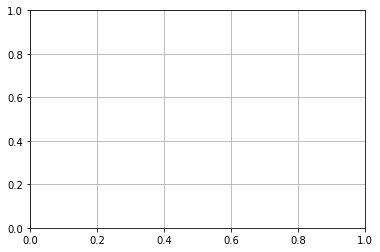

In [221]:
axes = plt.axes()
axes.grid()
plt.plot(X, Y)
plt.xlabel('Année')
plt.ylabel('PIB en $')
plt.show()

In [ ]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

In [ ]:
def graph():
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du paramètre PIB')
    plt.xlabel('Année')
    plt.ylabel('PIB en $')
    plt.plot(X , Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def PIB(year):
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    return slope*year + intercept

NameError: name 'X' is not defined

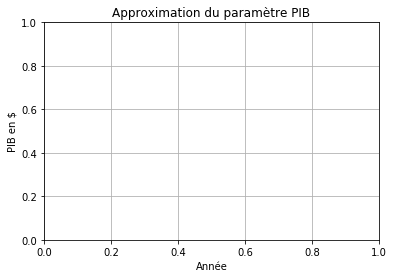

In [222]:
graph()

In [ ]:
def futur_mondial(year):
    """int->list[float]"""
    L=[]
    for i in range(2010,year):
        L.append(PIB(i))
    return L

In [ ]:
L=futur_mondial(2101)
annee_futur=[i for i in range(2010,2101)]
def graph_monde():
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du paramètre PIB')
    plt.xlabel('Année')
    plt.ylabel('PIB en $')
    plt.plot(annee_futur, L)
    plt.show()

In [ ]:
graph_monde()

In [223]:
PIB(2017)

TypeError: PIB() missing 3 required positional arguments: 'p', 'd', and 'fbcf'

Le PIB mondial de 2017 était de 79 865 000 000 000$.

Notre deuxième approche (PIB par continents) était plus proche de la réalité que celle-ci. Ainsi, nous prendrons la deuxième approche pour modéliser le futur.

## IV- PIB continental

On utilise les même données que dans le PIB mondial par continent.

### 1) Calcul de CF

In [224]:
cfc={"Afrique":1915, "Asie":2831, "Amérique du Nord":35639, "Amérique du Sud":5668, "Europe":17031, "Océanie":29997}
continents=["Europe", "Amérique du Nord","Asie", "Afrique", "Amérique du Sud", "Océanie"]
pop={"Europe":742074000,"Amérique du Nord":361208000,"Asie":4504428000,"Afrique":1256268000, 
            "Amérique du Sud":645593000,"Océanie":40691000}

In [225]:
def cf_continental(cfc, continents, pop, continent):
    """dict[str:int]*list[str]*dict[str:int]*str->int"""
    s=0
    for i in continents:
        if i==continent:
            s=s+cfc[i]*pop[i]
    return s

In [226]:
cf_continental(cfc, continents, pop, "Europe")

12638262294000

### 2) Calcul du FBCF

In [227]:
fbcfc={"Afrique":811, "Asie":2641, "Amérique du Nord":10489, "Amérique du Sud":1747, "Europe":5988, "Océanie":12822}

In [228]:
def fbcf_continental(fbcfc, continents, pop, continent):
    """dict[str:int]*list[str]*dict[str:int]*str->int"""
    s=0
    for i in continents :
        if i==continent:
            s=s+fbcfc[i]*pop[i]
    return s

In [229]:
fbcf_continental(fbcfc, continents, pop, "Europe")

4443539112000

### 3) Calcul de VS

In [230]:
vsc={"Afrique":32, "Asie":55, "Amérique du Nord":113, "Amérique du Sud":69, "Europe":106, "Océanie":98}

In [231]:
def vs_continental(vsc, continents, pop, continent):
    """dict[str:int]*list[str]*dict[str:int]*str->int"""
    s=0
    for i in continents:
        if i==continent:
            s=s+vsc[i]*pop[i]
    return s

In [232]:
vs_continental(vsc, continents, pop, "Europe")

78659844000

### 4) Calcul de X

D'après le site Perspective les exportations par continent en 2016/2017 sont :

Afrique : 450 141 000 000$

Asie : 6 622 214 000 000$

Amérique du Nord : 3 089 941 000 000$

Amérique du Sud : 603 638 000 000$

Europe : 8 560 857 000 000$

Océanie : 281 453 000 000$

In [233]:
xc={"Afrique":450141000000, "Asie":6622214000000, "Amérique du Nord":3089941000000, "Amérique du Sud":603638000000, "Europe":8560857000000, "Océanie":281453000000}

In [234]:
def x_continental(xc, continent):
    """dict[str:int]*str->int"""
    return xc[continent]

In [235]:
x_continental(xc,"Europe")

8560857000000

### 5) Calcul de M


D'après le site de Perspective les importations par continents en 2016/2017 sont :

Afrique : 590 331 000 000$

Asie : 6 084 681 000 000$

Amérique du Nord : 3 669 595 000 000$

Amérique du Sud : 644 905 000 000$

Europe : 7 870 121 000 000$

Océanie : 308 229 000 000$

In [236]:
mc={"Afrique":590331000000, "Asie":6084681000000, "Amérique du Nord":3669595000000, "Amérique du Sud":644905000000, "Europe":7870121000000, "Océanie":308229000000}

In [237]:
def m_continental(mc, continent):
    """dict[str:int]*str"""
    return mc[continent]

In [238]:
m_continental(mc, "Europe")

7870121000000

### Calcul du PIB

In [239]:
def PIB_continental(cfc, fbcfc, vsc, continents, xc, mc, pop, continent):
    """dict[str:int]*dict[str:int]*dict[str:int]*list[str]*dict[str:int]*dict[str:int]*dict[str:int]*str->int"""
    cfcu=cf_continental(cfc, continents, pop, continent)
    fbcfcu=fbcf_continental(fbcfc, continents, pop, continent)
    vscu=vs_continental(vsc, continents, pop, continent)
    xu=x_continental(xc, continent)
    mu=m_continental(mc, continent)
    return cfcu+fbcfcu+vscu+xu-mu

In [240]:
PIB_continental(cfc, fbcfc, vsc, continents, xc, mc, pop, "Europe")

17851197250000

In [241]:
def PIB_6continents(cfc, fbcfc, vsc, continents, xc, mc, pop):
    """dict[str:int]*dict[str:int]*dict[str:int]*list[str]*dict[str:int]*dict[str:int]*dict[str:int]->dict[str:int]"""
    D=dict()
    for i in continents:
        D[i]=PIB_continental(cfc, fbcfc, vsc, continents, xc, mc, pop, i)
    return D

In [242]:
PIB_6continents(cfc, fbcfc, vsc, continents, xc, mc, pop)

{'Afrique': 3324597144000,
 'Amérique du Nord': 16122965128000,
 'Amérique du Sud': 4790351012000,
 'Asie': 25433506556000,
 'Europe': 17851197250000,
 'Océanie': 1719559647000}

### Evolution PIB

In [276]:
def evolution_PIB(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,n5,m5,
                  probleme5,fixe5,n6,m6,probleme6,fixe6,cfc,fbcfc,vsc,continents,xc,mc):
    D={"Europe":[],"Amérique du Nord":[],"Asie":[],"Afrique":[],"Amérique du Nord":[],"Océanie":[]}
    for i in range(0,a+1):
        popu=dict()
        for j in continents:
            popu[j]=population(i,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)[j][0]
        for k in continents:
            D[k].append(PIB_continental(cfc, fbcfc, vsc, continents, xc, mc, popu, k))
    return D

In [278]:
evolution_PIB(10,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False,cfc,fbcfc,vsc,continents,xc,mc)

{'Afrique': [3324597144000,
  3410532844116,
  3498599970760,
  3588851389276,
  3681341277816,
  3776125154920,
  3873259918128,
  3972803877076,
  4074816781076,
  4179359871518,
  4286495901176],
 'Amérique du Nord': [16122965128000,
  16245340362306,
  16368612209602,
  16492787236110,
  16617872100534,
  16743873369096,
  16870797839223,
  16998652215860,
  17127443388916,
  17257178155818,
  17387863452716],
 'Amérique du Sud': [4790351012000,
  4836470099272,
  4883029410392,
  4930033143884,
  4977485535692,
  5025390874148,
  5073753485004,
  5122577723948,
  5171868006540,
  5221628778276,
  5271864529556],
 'Asie': [25433506556000,
  25646024249194,
  25860356047490,
  26076517426488,
  26294524011017,
  26514391547500,
  26736135926062,
  26959773158422,
  27185319416582,
  27412790983084,
  27642204300753],
 'Europe': [17851197250000,
  17859779631250,
  17868366290625,
  17876957251250,
  17885552513125,
  17894152076250,
  17902755940625,
  17911364106250,
  179199765731

In [292]:
L_annee=[i for i in range(2017,2117)]

def plot_PIB_continental(L1,L2,L3,L4,L5,L6):
    plt.figure()
    plt.plot(L_annee,L1)
    plt.plot(L_annee,L2)
    plt.plot(L_annee,L3)
    plt.plot(L_annee,L4)
    plt.plot(L_annee,L5)
    plt.plot(L_annee,L6)
    plt.legend([continent for continent in continents])
    plt.xlabel("Année")
    plt.ylabel("PIB")
    plt.show()
    return

In [302]:
PIB=evolution_PIB(99,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False,cfc,fbcfc,vsc,continents,xc,mc)
L1=PIB["Europe"]
L2=PIB["Amérique du Nord"]
L3=PIB["Asie"]
L4=PIB["Afrique"]
L5=PIB["Amérique du Sud"]
L6=PIB["Océanie"]

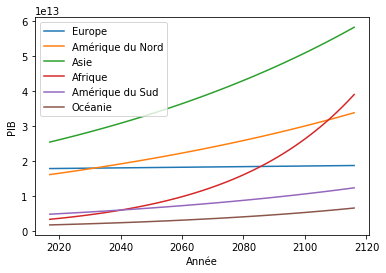

In [303]:
plot_PIB_continental(L1,L2,L3,L4,L5,L6)

In [281]:
def evolution_PIB_mondial(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,n5,m5,
                  probleme5,fixe5,n6,m6,probleme6,fixe6,cfc,fbcfc,vsc,continents,xc,mc):
    L=[]
    for i in range(0,a+1):
        s=0
        for j in continents:
            s=s+evolution_PIB(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,n5,m5,
                  probleme5,fixe5,n6,m6,probleme6,fixe6,cfc,fbcfc,vsc,continents,xc,mc)[j][i]
        L.append(s)
    return L

In [282]:
evolution_PIB_mondial(10,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False,cfc,fbcfc,vsc,continents,xc,mc)

[69242176737000,
 69741265219031,
 70245958148040,
 70756338944542,
 71272492683700,
 71794505819648,
 72322466812432,
 72856465464491,
 73396593680561,
 73942944819616,
 74495614224675]

In [304]:
def plot_PIB_mondial(L):
    plt.figure()
    plt.plot(L_annee,L)
    plt.xlabel("Année")
    plt.ylabel("PIB")
    plt.show()
    return

In [305]:
L=evolution_PIB_mondial(99,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False,cfc,fbcfc,vsc,continents,xc,mc)

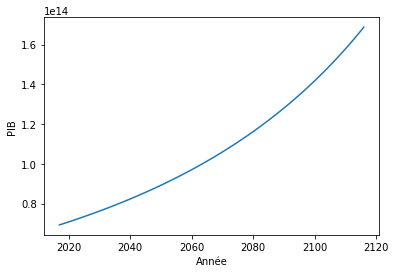

In [306]:
plot_PIB_mondial(L)

In [307]:
evolution_PIB_mondial(33,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False,cfc,fbcfc,vsc,continents,xc,mc)[33]

89200742583368

In [308]:
evolution_PIB_mondial(83,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False,cfc,fbcfc,vsc,continents,xc,mc)[83]

141767443733106

## III) TEP (Thanh)

## IV) CO2 (Tahar)##

## V) Assemblage de tous les paramètres ##